In [1]:
import random
from scipy.stats import norm, binom, expon, wilcoxon, kstest, mannwhitneyu
from statsmodels.stats import weightstats as stests
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Загружаем данные

In [2]:
df = pd.read_csv('test2.csv') # данный файл
x = df[df['group'] == 'test']['avg_sum']
y = df[df['group'] == 'control']['avg_sum']

Далее мы хотели бы понять, из какого семейства распределений пришли наши данные, чтобы оттталкиваясь от этого выбрать подходящий тест  
В данном случае мы тестируем сумму чека клиентов, так что стоит ожидать, что нормального распределения тут не будет  
Чтобы это проверить нарисуем распределения наших данных в виде гистограмм

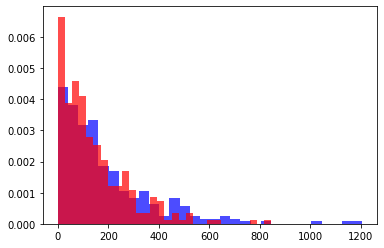

In [3]:
plt.hist(x, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(y, bins=30, density=True, color='red', alpha=0.7)
plt.show()

Действительно, распределение тут явно не нормальное    
Поэтому стоит использовать тест Манна-Уитни, который не опирается на предположение о нормальности распредения данных  
Так как тест нацелен на увеличение суммы чека клиента, то мы выбираем одностороннюю альтернативу

In [5]:
res = mannwhitneyu(x, y, alternative='greater')
print("Z-statistic:", res[0])
print("P-value:", res[1])

Z-statistic: 50943.0
P-value: 0.0024922812779452318


Видим, что p-value меньше 0.05 и даже 0.01, поэтому мы отклоняем нулевую гипотезу и признаем альтернативную гипотезу о том, что сумма чека клиента статзначимо увеличилась